In [1]:
%load_ext autoreload
%autoreload 2
from helper import create_tsp_graph,plot_tsp_graph,bitstring_to_path,cost
from classical import solve_tsp_classical
from alternating_operator import get_expectation,analyse_result,create_qaoa_circ
from scipy.optimize import minimize
from qiskit.tools.visualization import plot_histogram
from qiskit import transpile
from qaoa import get_expectation_qaoa

In [2]:
reps = 1
ncities = 4

In [3]:
G = create_tsp_graph(ncities)

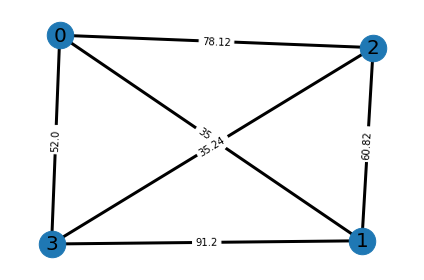

In [4]:
plot_tsp_graph(G)

In [5]:
expectation = get_expectation(G,reps,shots=1024)

res = minimize(expectation,
               [1 for _ in range(reps*4)] ,
                      method='COBYLA',
                      options = {'tol' : 1e-4,'disp' : True})

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


Current expected cost: 224.43
Current expected cost: 224.43
Current expected cost: 224.43
Current expected cost: 206.51
Current expected cost: 206.51
Current expected cost: 189.01
Current expected cost: 229.73
Current expected cost: 189.01
Current expected cost: 229.94
Current expected cost: 189.01
Current expected cost: 229.73
Current expected cost: 211.51
Current expected cost: 189.01
Current expected cost: 185.43
Current expected cost: 206.51
Current expected cost: 195.54
Current expected cost: 185.43
Current expected cost: 207.47
Current expected cost: 185.43
Current expected cost: 213.12
Current expected cost: 219.47
Current expected cost: 219.01
Current expected cost: 185.35
Current expected cost: 219.63
Current expected cost: 185.35
Current expected cost: 230.07
Current expected cost: 185.35
Current expected cost: 219.41
Current expected cost: 207.87
Current expected cost: 186.18
Current expected cost: 190.17
Current expected cost: 184.28
Current expected cost: 184.32
Current ex

In [6]:
res

     fun: 183.79577039525228
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 54
  status: 1
 success: True
       x: array([1.00002428, 0.98594931, 2.5523317 , 0.97202058])

Evolved Hamiltonian is not composed of only Paulis, converting to Pauli representation, which can be expensive.


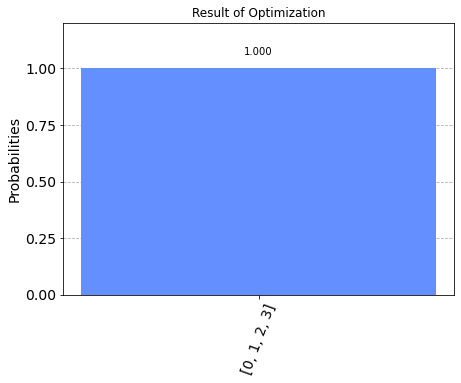

In [7]:
fig,counts = analyse_result(G,res.x,reps=reps,transform_labels_to_path=True,filter_unique_path=True)
fig

In [8]:
for key, val in counts.items():
    if val>1:
        path = bitstring_to_path(key)
        print(path,':', val , f"   cost = {round(cost(G,path),2)}")

[0, 1, 2, 3] : 1024    cost = 183.8


In [9]:
from itertools import permutations
for p in permutations([0,1,2,3]):
    print(p,':',cost(G,p))

(0, 1, 2, 3) : 183.79577039525228
(0, 1, 3, 2) : 240.2901265500841
(0, 2, 1, 3) : 282.1419518766385
(0, 2, 3, 1) : 240.2901265500841
(0, 3, 1, 2) : 282.1419518766385
(0, 3, 2, 1) : 183.7957703952523
(1, 0, 2, 3) : 240.29012655008412
(1, 0, 3, 2) : 183.7957703952523
(1, 2, 0, 3) : 282.1419518766385
(1, 2, 3, 0) : 183.7957703952523
(1, 3, 0, 2) : 282.1419518766385
(1, 3, 2, 0) : 240.2901265500841
(2, 0, 1, 3) : 240.2901265500841
(2, 0, 3, 1) : 282.1419518766385
(2, 1, 0, 3) : 183.7957703952523
(2, 1, 3, 0) : 282.1419518766385
(2, 3, 0, 1) : 183.7957703952523
(2, 3, 1, 0) : 240.2901265500841
(3, 0, 1, 2) : 183.7957703952523
(3, 0, 2, 1) : 282.1419518766385
(3, 1, 0, 2) : 240.2901265500841
(3, 1, 2, 0) : 282.1419518766385
(3, 2, 0, 1) : 240.2901265500841
(3, 2, 1, 0) : 183.7957703952523


In [10]:
solve_tsp_classical(G)

([0, 1, 2, 3], 183.79577039525228)

In [11]:
expectation_qaoa = get_expectation_qaoa(G,reps,shots=1024,penalty=1.)

res_qaoa = minimize(expectation_qaoa,
               [1 for _ in range(reps*2)] ,
                      method='COBYLA',
                      options = {'tol' : 1e-4,'disp' : True})

1
2
3
4
5
6
Current expected cost: 364.21
Current expected cost: 364.8
Current expected cost: 364.21
Current expected cost: 183.8
Current expected cost: 364.21
Current expected cost: 358.15
Current expected cost: 183.8
Current expected cost: 358.15
Current expected cost: 297.06
Current expected cost: 224.45
Current expected cost: 194.22
Current expected cost: 183.8
Current expected cost: 194.22
Current expected cost: 186.45
Current expected cost: 184.5
Current expected cost: 183.97
Current expected cost: 183.8
Current expected cost: 183.97
Current expected cost: 183.97
Current expected cost: 183.8
Current expected cost: 183.8
Current expected cost: 183.8
Current expected cost: 183.8
Current expected cost: 183.8


In [63]:
res_qaoa

     fun: 142.8211660789969
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 24
  status: 1
 success: True
       x: array([0., 1.])